# COVID-19 Global Analysis
Analysis of the global COVID-19 pandemic (2020-2025)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Loading Data

In [16]:
df = pd.read_csv('covid_data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AF,Afghanistan,EMR,NaN,0,NaN,0
1,2020-01-04,DZ,Algeria,AFR,NaN,0,NaN,0
2,2020-01-04,AL,Albania,EUR,NaN,0,NaN,0
3,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
4,2020-01-04,AS,American Samoa,WPR,0.0,0,0.0,0


## 2. Data Preparation

In [17]:
# Convert date
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Fill missing values with zeros
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)

## 3. Global Case Dynamics

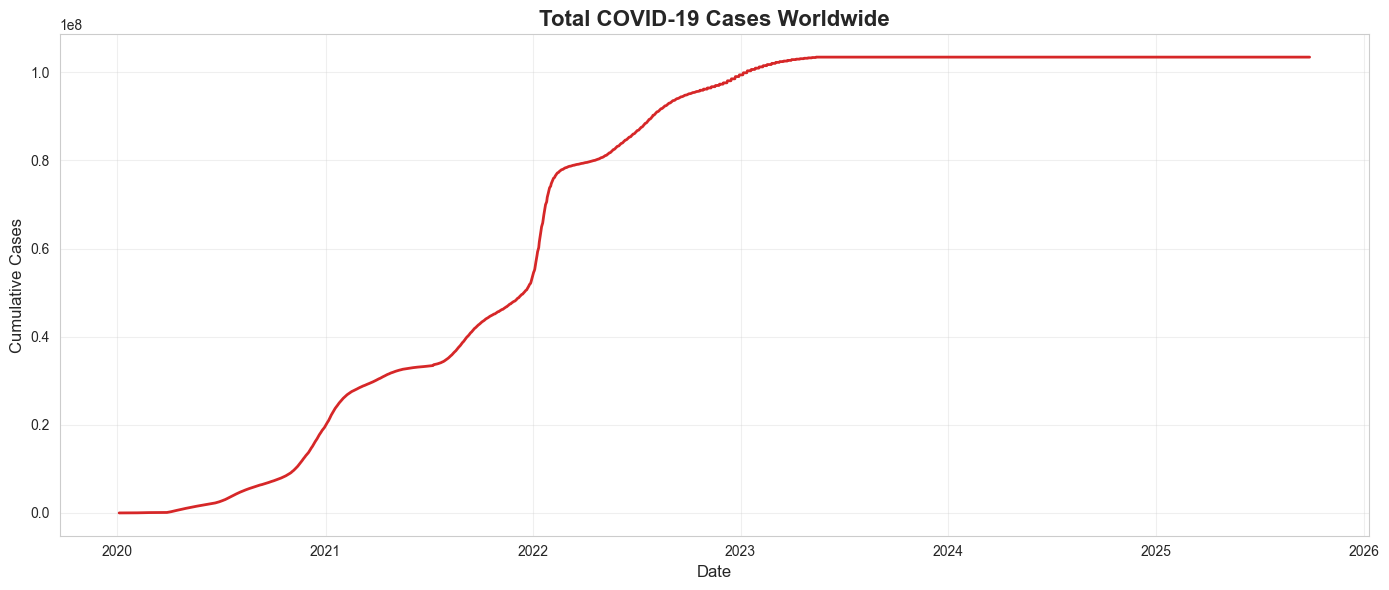

In [18]:
# Group by date
daily_global = df.groupby('Date_reported').agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'max'
}).reset_index()

# Plot cumulative cases
plt.figure(figsize=(14, 6))
plt.plot(daily_global['Date_reported'], daily_global['Cumulative_cases'], linewidth=2, color='#d62728')
plt.title('Total COVID-19 Cases Worldwide', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Top 10 Countries by Cases

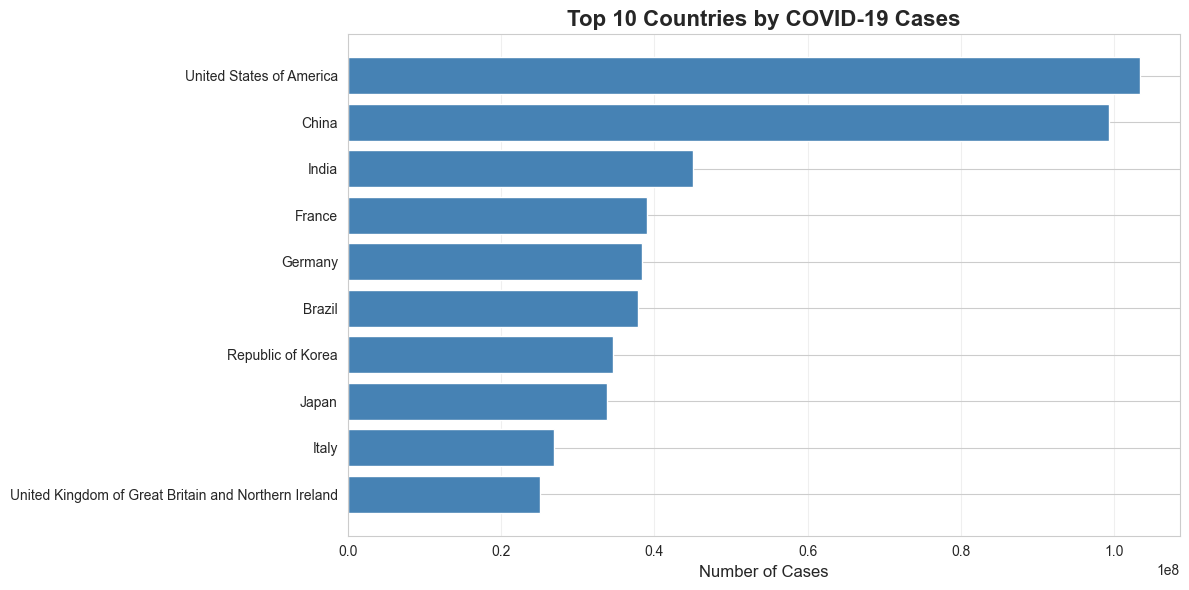

In [19]:
# Get latest date for each country
latest_data = df.sort_values('Date_reported').groupby('Country').tail(1)

# Top 10 countries
top10 = latest_data.nlargest(10, 'Cumulative_cases')[['Country', 'Cumulative_cases']]

plt.figure(figsize=(12, 6))
plt.barh(top10['Country'], top10['Cumulative_cases'], color='steelblue')
plt.xlabel('Number of Cases', fontsize=12)
plt.title('Top 10 Countries by COVID-19 Cases', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Daily New Cases

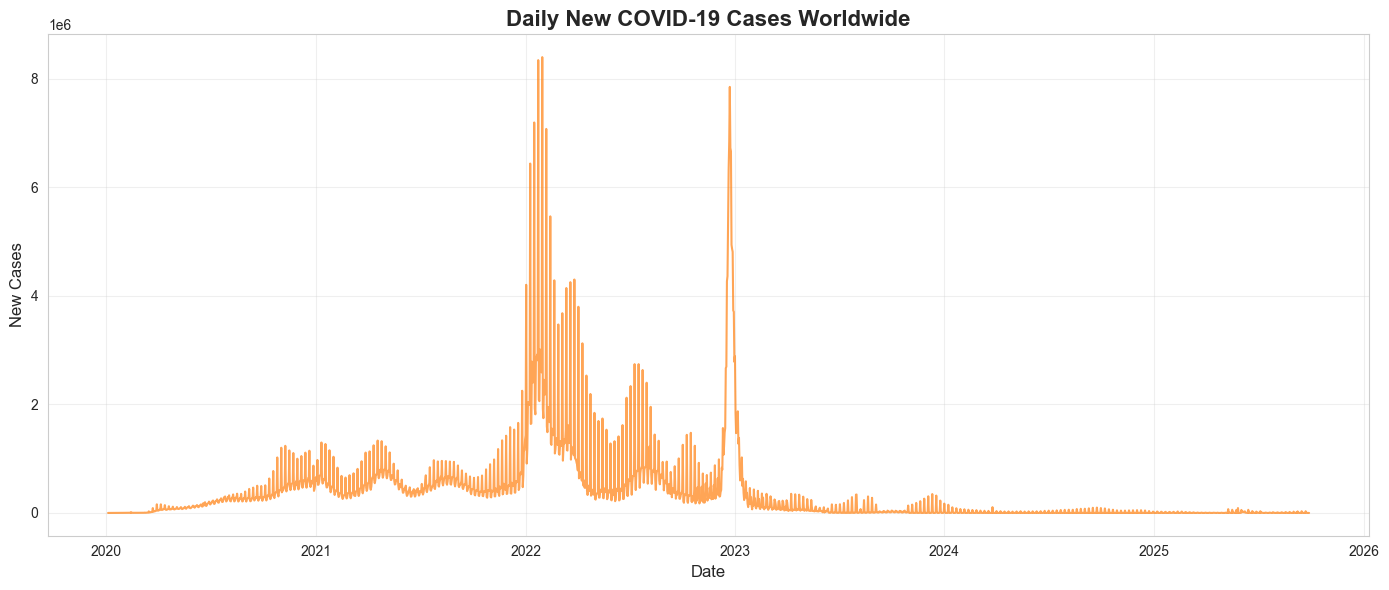

In [20]:
# Daily new cases
plt.figure(figsize=(14, 6))
plt.plot(daily_global['Date_reported'], daily_global['New_cases'], linewidth=1.5, color='#ff7f0e', alpha=0.7)
plt.title('Daily New COVID-19 Cases Worldwide', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Statistics

In [21]:
print("=" * 60)
print("COVID-19 GLOBAL STATISTICS")
print("=" * 60)

total_cases = daily_global['Cumulative_cases'].max()
total_deaths = df.groupby('Date_reported')['Cumulative_deaths'].max().max()
countries_affected = df['Country'].nunique()

print(f"Total cases: {total_cases:,.0f}")
print(f"Total deaths: {total_deaths:,.0f}")
print(f"Countries affected: {countries_affected}")
print(f"Data period: {df['Date_reported'].min().strftime('%Y-%m-%d')} - {df['Date_reported'].max().strftime('%Y-%m-%d')}")

# Mortality rate
mortality_rate = (total_deaths / total_cases * 100)
print(f"Global mortality rate: {mortality_rate:.2f}%")

COVID-19 GLOBAL STATISTICS
Total cases: 103,436,829
Total deaths: 1,228,289
Countries affected: 240
Data period: 2020-01-04 - 2025-09-28
Global mortality rate: 1.19%


## Conclusions

From the analysis:
- COVID-19 pandemic began in early 2020
- Multiple waves of infection with different peaks were observed
- The most affected countries are densely populated
- Total number of cases continued to grow throughout the period